In [11]:
from sedfitter.sed import SEDCube
from sedfitter.fit import Fitter
from sedfitter.fit_info import FitInfoFile
from sedfitter.fit_info import FitInfo
from sedfitter.extinction import Extinction
from sedfitter.source import Source
import sedfitter
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
import astropy.units as u
import os

In [3]:
extinction = Extinction.from_file('../data/raw/whitney.r550.par')

In [4]:
apertures = [3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
             3., 3., 20., 30., 30., 30.] * u.arcsec

In [5]:
filterstest2 = [.36 * u.um, .44 * u.um, .55 * u.um, .64 * u.um, .79 * u.um, 
               1.235 * u.um, 1.662 * u.um, 2.159 * u.um, 3.55 * u.um, 4.493 * u.um,
               5.580 * u.um, 7.650 * u.um, 9.95 * u.um, 12.93 * u.um, 17.72 * u.um, 24.28 * u.um,
               29.95 * u.um, 35.06 * u.um, 71.42 * u.um, 155.9 * u.um, 443.0 * u.um, 863.0 * u.um]

In [9]:
# Rather than use the sedfitter.fit() function, we go through the steps it takes ourselves so as to keep the output FitInfo file
# Here we instantiate a Fitter object
fitter = Fitter(filterstest2, apertures, '../data/galaxySEDs/Ly_break',
              extinction_law=extinction,
              distance_range=[0.869, 0.961] * u.kpc,
              av_range=[0., 40.], remove_resolved=True)

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  Ly_break
   Log[d] stepping     :  0.02

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

Data shape=(1, 22).  use_memmap=True
   Reading fluxes at 0.36 um
   Reading fluxes at 0.44 um
   Reading fluxes at 0.55 um
   Reading fluxes at 0.64 um
   Reading fluxes at 0.79 um
   Reading fluxes at 1.235 um
   Reading fluxes at 1.662 um
   Reading fluxes at 2.159 um
   Reading fluxes at 3.55 um
   Reading fluxes at 4.493 um
   Reading fluxes at 5.58 um
   Reading fluxes at 7.65 um
   Reading fluxes at 9.95 um
   Reading fluxes at 12.93 um
   Reading fluxes at 17.72 um
   Reading fluxes at 24.28 um
   Reading fluxes at 29.95 um
   Reading fluxes at 35.06 um
   Reading fluxes at 71.42 um
   Reading fluxes at 155.9 um


In [15]:
# Opening Source file to fit
sourcepath = '../data/raw/data_ngc2264_20_normalized.txt'
sourcefile = open(sourcepath,'r')
s = Source()
s = Source.from_ascii(sourcefile.readline())

In [16]:
# Fits to source using call to models.fit()
info = fitter.fit(s)

In [17]:
# Lets check out what's in info
print(info.chi2)
print(info.model_fluxes)
print(info.source)
print(info.av)
print(info.sc)
print(info.model_id)
print(info.model_name)

[353.18296527]
[[-2.33703222 -1.53744623 -0.74828938 -0.4806601   1.00227322  2.18797229
   2.62128734  2.87757532  3.1655842   3.23581394  3.31752296  3.47280295
   3.57611645  3.7269783   3.78150948  3.96209532  4.24570634  4.2613166
   4.42981346  4.60641589  2.83366112  2.41378446]]
Source name : 20
x           : 100.20250
y           :   9.59936
F =   0.0000e+00 + / -   0.0000e+00 mJy (0)  Log[F] =  0.00000+ / - 0.00000
F =   0.0000e+00 + / -   0.0000e+00 mJy (0)  Log[F] =  0.00000+ / - 0.00000
F =   1.4485e-01 + / -   1.4485e-02 mJy (1)  Log[F] = -0.84125+ / - 0.04343
F =   1.0000e+00 + / -   1.0000e-01 mJy (1)  Log[F] = -0.00217+ / - 0.04343
F =   4.5303e+00 + / -   4.5303e-01 mJy (1)  Log[F] =  0.65396+ / - 0.04343
F =   9.3388e+01 + / -   9.3388e+00 mJy (1)  Log[F] =  1.96812+ / - 0.04343
F =   3.2156e+02 + / -   3.2156e+01 mJy (1)  Log[F] =  2.50509+ / - 0.04343
F =   7.2599e+02 + / -   7.2599e+01 mJy (1)  Log[F] =  2.85876+ / - 0.04343
F =   1.5438e+03 + / -   1.5438e+02 mJy

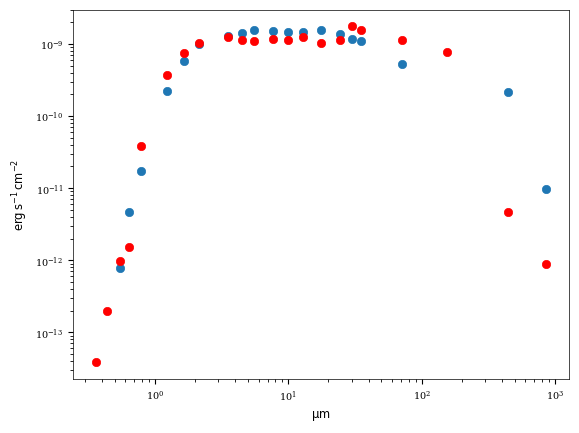

In [49]:
#from astropy.visualization import quantity_support
#quantity_support()
modelflux = 10**(info.model_fluxes) * u.mJy
modelfluxdens = modelflux.to(u.erg / u.cm**2 / u.s, equivalencies = u.spectral_density(filterstest2))
sourceflux = np.array(info.source.to_ascii().split()[25:-1:2]).astype(float)
sourceflux = sourceflux * u.mJy
filterstest2 = [x.value for x in filterstest2] * u.um
sourcefluxdens = sourceflux.to(u.erg / u.cm**2 / u.s, equivalencies = u.spectral_density(filterstest2))
plt.scatter(filterstest2, sourcefluxdens)
plt.scatter(filterstest2,modelfluxdens,color='r')
plt.xscale('log')
plt.yscale('log')

In [50]:
# Save info for plotting methods MAKE SURE TO CLOSE FILE I/O
output = '../data/outputs/output_ngc2264_Ly_break2.fitinfo'
fout = FitInfoFile(output,'w')
#info = info.keep(output_format)
fout.write(info)
fout.close()

In [51]:
sedfitter.plot('../data/outputs/output_ngc2264_Ly_break2.fitinfo',
                   output_dir='../data/outputs/galaxytest5', format='png',
                   plot_mode='A',
                   select_format=('F', 3.),
                   show_convolved=False, show_sed=True,
                   x_mode='M', x_range=(0.1, 2000),
                   y_mode='M', y_range=(1.e-14, 2e-8))